# 7. The issue with polynomial roots:

**(a)** For this problem, I have written a very basic Newton-Raphson root finder which takes in an initial guess and spits out the root after 100 iterations. It would be preferable to have the f($x_n$) ~ 0 after which the iteration should be stopped instead of fixing the number of iterations. However, as discussed below, the value of the function jumps to extremely large numbers around the roots and the polynomial has unwanted spikes for larger and larger x values. Therefore, using an epsilon to decide when to kill the root finder without restricting the number of iterations didn't work.

In [58]:
import numpy as np

roots = np.arange(1,21)  #initializing the roots from 1-20

coeffs = np.poly(roots) #array of coefficients in decending powers
coeffs_der = np.flip(roots,0)*coeffs[0:20] #constructing coefficients for derivative of polynomial
print(coeffs)

[ 1.00000000e+00 -2.10000000e+02  2.06150000e+04 -1.25685000e+06
  5.33279460e+07 -1.67228082e+09  4.01717716e+10 -7.56111184e+11
  1.13102770e+13 -1.35585183e+14  1.30753501e+15 -1.01422999e+16
  6.30308121e+16 -3.11333643e+17  1.20664780e+18 -3.59997952e+18
  8.03781182e+18 -1.28709312e+19  1.38037598e+19 -8.75294804e+18
  2.43290201e+18]


In [39]:
f = np.poly1d(coeffs)  #constructing the callable polynomial function
f_der = np.poly1d(coeffs_der) #constructing the callable polynomial derivative function

eps = 1e-1
x0 = 21
diff = abs(f(x0))
counter = 1

while(diff > eps):
    x_new = x0 - (f(x0)/f_der(x0))
    diff = abs(f(x_new))
    x0 = x_new
    counter += 1
    if(counter > 100): break

print(x0)

20.000004547457653


**(b)** So, for an initial guess of 21, we land to a solution 20.000004547457653, which is not exactly 20 (as we would have normally expected).

Checking the value of the function at x=20 yields unusually large numbers.

In [40]:
abs(f(20))

27029504000.0

On inspecting the plot we find that the function is poorly behaved (which creeps in due to numerical methods of calculating the polynomial). 

<IPython.core.display.Javascript object>


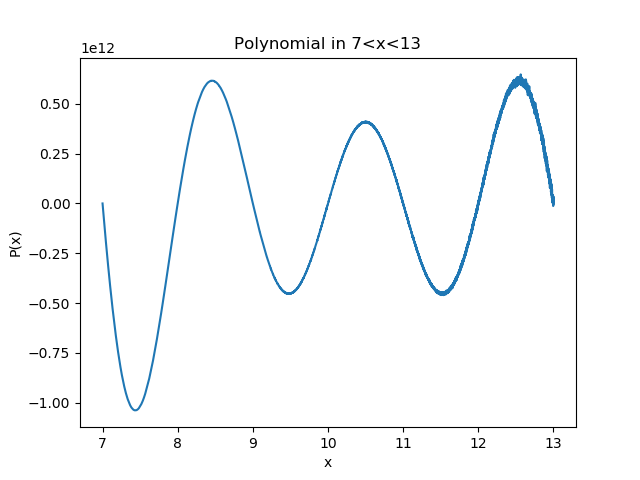

Text(0.5,0,'x')

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
x = np.linspace(7,13,10000)
plt.plot(x,f(x))
plt.title('Polynomial in 7<x<13')
plt.ylabel('P(x)')
plt.xlabel('x')

On zooming into the zone between 12.5 and 1.26, we the sharp spikes in the plot can be seen. On inspecting the plot, it can be seen that these features grow with increasing x.

<IPython.core.display.Javascript object>


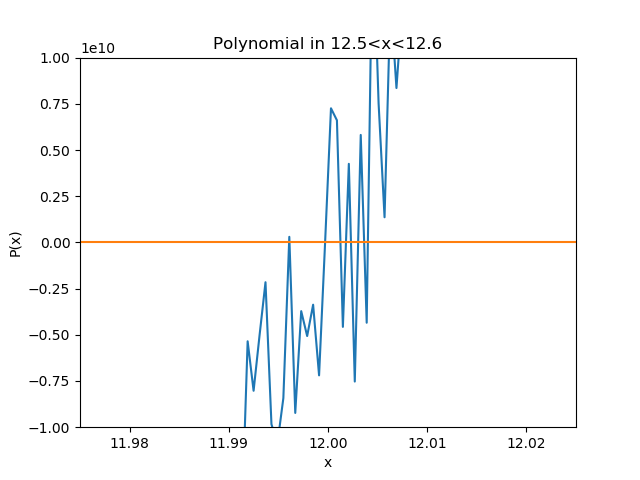

In [42]:
plt.figure()
x = np.linspace(7,13,10000)
plt.plot(x,f(x))
plt.title('Polynomial in 12.5<x<12.6')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.xlim([11.975,12.025])
plt.ylim([-1e10,1e10])
plt.xlabel('x')
plt.ylabel('P(x)')

plt.plot(x,np.zeros(len(x)))  #zero line to show the number of points where the function is crossing
                              #y=0 in the vicinity of a root.

**(c)** Tweaking the value of $a_{20}$ by 1e-8, 1e-6, 1e-4 and 1e-2 and inspecting the optimized root.

In [59]:
#Tweaking the value of a_20, the coefficient of x^20

delta = [1e-8,1e-6,1e-4,1e-2]  #list of values to tweak a_20
coeffs_tweaked = np.zeros(len(coeffs))

eps = 1e-6
x0 = 21

print('Initial guess: %f'%x0)

for i in delta:
    coeffs_tweaked[:] = coeffs[:]  #assigning element-wise to avoid setting a pointer reference
    coeffs_tweaked[0] = coeffs[0] + i  #tweaking
    
    #runnning the same steps as earlier
    
    coeffs_tweaked_der = np.flip(roots,0)*coeffs_tweaked[0:20] #constructing coefficients for derivative of polynomial

    f = np.poly1d(coeffs_tweaked)  #constructing the callable polynomial function
    f_der = np.poly1d(coeffs_tweaked_der) #constructing the callable polynomial derivative function

    diff = abs(f(x0))
    counter = 1

    while(diff > eps):
        x_new = x0 - (f(x0)/f_der(x0))
        diff = abs(f(x_new))
        x0 = x_new
        counter += 1
        if(counter > 100): break

    print('Root for a_20 -> a_20 + %e:'%i,x0)
    

Initial guess: 21.000000
Root for a_20 -> a_20 + 1.000000e-08: 9.585012052844606
Root for a_20 -> a_20 + 1.000000e-06: 7.752710750119963
Root for a_20 -> a_20 + 1.000000e-04: 5.969334629328867
Root for a_20 -> a_20 + 1.000000e-02: 5.469592679742264


**(d)** Tweaking the coefficient $a_{19}$ by 2^{-23} and checking the optimized roots.

In [43]:
#Tweaking the value of a_19, the coefficient of x^19

delta = 2**(-23)  #list of values to tweak a_20
coeffs_tweaked = np.zeros(len(coeffs))

eps = 1e-6
x0_list = [16.3,17.3]  #values close to the roots 16 and 17

for xi in x0_list:
    print('Initial guess: %d'%xi)
    x0 = xi
    
    coeffs_tweaked[:] = coeffs[:]  #assigning element-wise to avoid setting a pointer reference
    coeffs_tweaked[1] = coeffs[1] + delta  #tweaking a_19
    
    #runnning the same steps as earlier
    
    coeffs_tweaked_der = np.flip(roots,0)*coeffs_tweaked[0:20] #constructing coefficients for derivative of polynomial

    f = np.poly1d(coeffs_tweaked)  #constructing the callable polynomial function
    f_der = np.poly1d(coeffs_tweaked_der) #constructing the callable polynomial derivative function

    diff = abs(f(x0))
    counter = 1

    while(diff > eps):
        x_new = x0 - (f(x0)/f_der(x0))
        diff = abs(f(x_new))
        x0 = x_new
        counter += 1
        if(counter > 100): break

    print('Root for changing a_%d -> a_%d + %e is'%(xi,xi,delta),x0)

Initial guess: 16
Root for changing a_16 -> a_16 + 1.192093e-07 is 9.501749921864288
Initial guess: 17
Root for changing a_17 -> a_17 + 1.192093e-07 is 9.501321353062579


So in tweaking $a_{19}$ by $2^{-23}$ which should be an exact machine number (and hence no error from rounding), we still find that the solution deviates largely from the expected solutions, namely, 16 and 17. Instead the roots converge close to 9.5 in both the cases.

In [57]:
r = np.array([14,16,17,20])  #the values of roots where we shall be computing the condition of f

for omegak in r:
    condf = 0.0
    for i in range(1,len(roots)): #going from a_19 to a_0
        condf += coeffs[i]*(omegak**(len(roots)-i-1))/f_der(omegak)
    
    print('Condition number for r = %d is: '%omegak,condf)

Condition number for r = 14 is:  -697448750.8405721
Condition number for r = 16 is:  1679479600.0575337
Condition number for r = 17 is:  1738416829.831037
Condition number for r = 20 is:  -1891772600.0711527


**(e) (ii)** The condition number for the polynomial for the above roots is very large. We know that for a large value of (condf)($x$), the problem is ill-posed. The condition number for $\omega_k = 20$ which is smaller than the larger $x$'s and therefore the solution of the roots is better around smaller values. We find that in case of the Wilkinson polynomial, the magnitude of the condition number increases with increasing x. Therefore, the problem is not well posed.

**(iii)** As a result I do not think that there can be a clever algorithm which could alleviate this problem. If on the contrary, the (condf)($x$) was small and bounded but the (condA)(x) was not, we could have tried to think about an alternate algorithm. However, here the problem itself is not well posed for solving. 

The primary issue here is the fact the the getting a solution to a very high order Wilkinson polynomial forces us to perform numerical subtractions with numbers of very large magnitudes. As a result the garbage bits in the mantissa (as a result of catastrophic cancellations) get amplified due to the large exponent. Thus, the error that creeps in is very large and gets larger as $x$ increases (because that is where the error due to subtraction has a large magnitude).